<h1 align = 'center'>INDEPENDENT COMPONENT ANALYSIS AND IT'S APPLICATIONS TO DISTINGUISH THE SOUNDS MUSICAL INSTRUMENTS

This Project is created as a part of the Academic Currciculum Project for the Machine Learning Course (CS331). This project is created by the following team members.
1. Somesh Agrawal
2. Raj Hans Khoiwal
3. Aniket Chaudhri
4. Adarsh Anand

## Table of Content
1. What is Independent Component Analysis?
2. Mathematics and Concepts behind ICA
3. Applications of ICA
4. Our Application to ICA
5. Introducing the Dataset
6. Visualization of Audio Files
7. Listening the Audio Files
8. Applying FastICA to get the Desired Results
9. Final Results

# What is Independent Component Analysis?

**<big>Independent Component Analysis (ICA)</big> is a statistical method used to separate a multivariate signal into independent, non-Gaussian components. In simpler terms, ICA can be used to separate a mixed signal into its individual source components based on the statistical properties of each source**

For example, imagine you have a recording of a band playing several instruments together, and you want to separate the audio into separate tracks for each instrument. ICA could be used to separate the mixed audio signal into independent components, each corresponding to a different instrument, based on the statistical properties of the audio data.

ICA works by assuming that the mixed signal is a linear combination of the independent source signals, and then using mathematical techniques to estimate the original sources. This estimation process is based on finding a set of basis functions (called "independent components") that capture the underlying statistical properties of the source signals.

# Mathematical Concepts Behind ICA

# Applications of ICA

Independent Component Analysis (ICA) has a wide range of applications in signal processing, data analysis, and machine learning. Here are some examples of how ICA can be used in various fields:

1. **Audio Processing**: ICA can be used to separate mixed audio signals into individual tracks corresponding to different sources, such as separating vocals from music, or isolating specific instruments from a band recording.

2. **Image Processing**: ICA can be used to separate mixed images into individual components, such as separating a face from a background or extracting text from a document.

3. **Biomedical Signal Processing**: ICA can be used to separate complex signals in biomedical data, such as separating brain activity signals from electroencephalogram (EEG) recordings, or identifying different heartbeats from electrocardiogram (ECG) signals.

4. **Finance**: ICA can be used to identify underlying factors that contribute to financial data, such as identifying trends in stock prices or separating mixed signals in financial time series data.


# Our Application or Project Detail to ICA

ICA can be used to separate mixed audio signals into individual tracks corresponding to different sources, such as separating vocals from music, or isolating specific instruments from a band recording.

In this notebook, we'll use Independent Component Analysis to **retrieve original Audio Signals** from three observations each of which contains a **different mix of the original Audio Signals signals**.

In [26]:
!pip3 install wave --upgrade

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1240 sha256=682e3a5a53e7ca410f92873450bba064b6399218c1d1df4ad6b38e8577d73569
  Stored in directory: c:\users\somesh\appdata\local\pip\cache\wheels\ee\3e\b3\bdee8d885ec04fd42bd239e9d9ab9dc94e69aad318c0d9936c
Successfully built wave


In [1]:
import IPython
import numpy as np
import wave

mix_1_wave = wave.open('ICA mix 1.wav','r')

In [2]:
mix_1_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [3]:
# Extract Raw Audio from Wav File
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'int16')
signal_1

C:\Users\Somesh\AppData\Local\Temp/ipykernel_22556/1260326697.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_1 = np.fromstring(signal_1_raw, 'int16')


array([  879,  1268,  1460, ...,  9204,  9553, 10006], dtype=int16)

In [4]:
'length: ', len(signal_1) , 'first 100 elements: ',signal_1[:100]

('length: ',
 264515,
 'first 100 elements: ',
 array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
         3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
         4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
         5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
         5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
         3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
          227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
        -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
        -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
        -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
        -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476,
        -3021], dtype=int16))

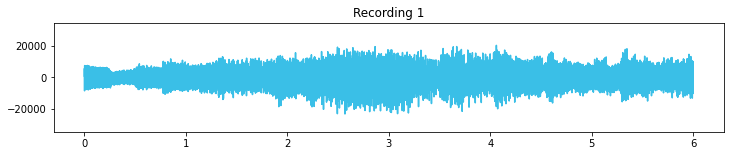

In [5]:
import matplotlib.pyplot as plt

fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))


plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

In [6]:

mix_2_wave = wave.open('ICA mix 2.wav','r')

#Extract Raw Audio from Wav File
signal_raw_2 = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_raw_2, 'int16')


mix_3_wave = wave.open('ICA mix 3.wav','r')

#Extract Raw Audio from Wav File
signal_raw_3 = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_raw_3, 'int16')

C:\Users\Somesh\AppData\Local\Temp/ipykernel_22556/3277206798.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_2 = np.fromstring(signal_raw_2, 'int16')
C:\Users\Somesh\AppData\Local\Temp/ipykernel_22556/3277206798.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_3 = np.fromstring(signal_raw_3, 'int16')


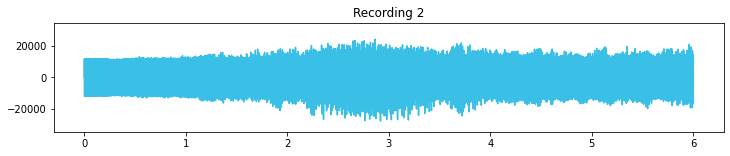

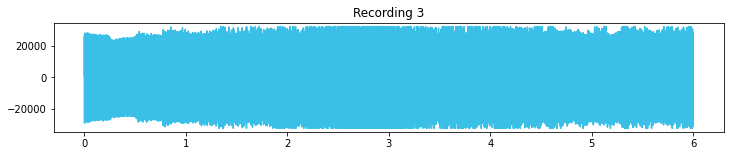

In [7]:
plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()


plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

In [8]:
IPython.display.Audio("ICA mix 1.wav")

In [9]:
IPython.display.Audio("ICA mix 2.wav")

In [10]:
IPython.display.Audio("ICA mix 3.wav")

In [11]:
X = list(zip(signal_1, signal_2, signal_3))

# Let's peak at what X looks like
X[:10]

[(879, 157, 879),
 (1268, 899, 2584),
 (1460, 1610, 4081),
 (1756, 2325, 5682),
 (1943, 3022, 7147),
 (2216, 3718, 8689),
 (2407, 4386, 10114),
 (2668, 5056, 11583),
 (2866, 5690, 12954),
 (3106, 6318, 14327)]

In [12]:
from sklearn.decomposition import FastICA

# Initializing FastICA with n_components=3
ica = FastICA(n_components=3)

# Running the FastICA algorithm using fit_transform on dataset X
ica_result = ica.fit_transform(X)

C:\Users\Somesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [13]:
ica_result.shape

(264515, 3)

In [14]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

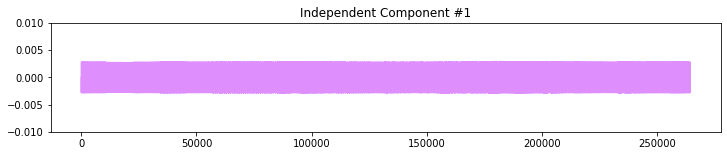

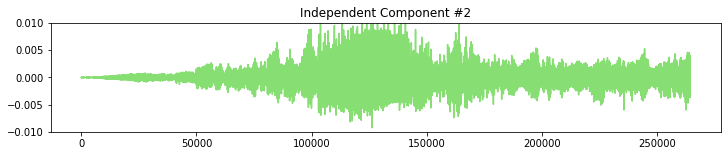

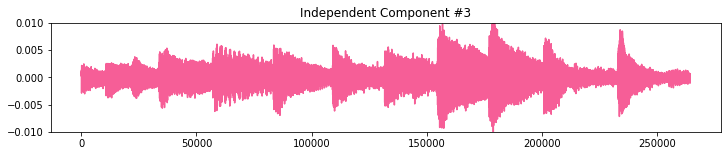

In [15]:
# Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#f65e97")
plt.ylim(-0.010, 0.010)
plt.show()

In [16]:
from scipy.io import wavfile

# Converting to int, mapping the appropriate range, and increasing the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)


# Writing wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

In [17]:
IPython.display.Audio("result_signal_1.wav")

In [18]:
IPython.display.Audio("result_signal_2.wav")

In [19]:
IPython.display.Audio("result_signal_3.wav")